In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#회귀분석
from statsmodels.formula.api import ols

#qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant

#선형 모델 formula(y~X1 + X2+ ...)
import statsmodels.formula.api as smf

#평가함수
from statsmodels.tools.eval_measures import rmse
%matplotlib inline

#다중공산성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

#선형회귀모형
from sklearn.linear_model import LinearRegression

#변수 선택법(후진제거법)
from sklearn.feature_selection import RFE

#scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler

#나무 구조 생성 및 저장
from sklearn.tree import export_graphviz

#나무 구조 시각화(.dot 확장자 파일 불러오기)
import graphviz

#데이터 분할 : train, test
from sklearn.model_selection import train_test_split

#회귀분석
import statsmodels.api as sm

#예측/회귀 decision tree
from sklearn.tree import DecisionTreeRegressor

#예측/회귀 Random Forest
from sklearn.ensemble import RandomForestRegressor as RFR

#예측/회귀 Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor as GBR

#평가함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

#주성분 분석
from sklearn.decomposition import PCA

#날짜 데이터 생성
from datetime import datetime

#자기상관 함수, 부분 자기상관 함수
from statsmodels.tsa.arima_model import ARIMA

In [24]:
matplotlib.rc('font', family = 'NanumGothic')

### STEP0 평가 함수 정의
평가함수 rmse, mape 생성(sklearn에서 제공되지 않는 함수 정의)

In [3]:
#RMSE: root mean squared error 함수
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

#MAPE: mean absoulte percentage error 함수
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)/ y_true))*100

### STEP1 데이터 구성하기

In [4]:
df_raw = pd.read_csv('/home/piai/Downloads/체질검사.csv', engine = 'python')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   FAT      252 non-null    float64
 1   AGE      252 non-null    int64  
 2   WEIGHT   252 non-null    float64
 3   HEIGHT   252 non-null    float64
 4   NECK     252 non-null    float64
 5   CHEST    252 non-null    float64
 6   ABDOMEN  252 non-null    float64
 7   HIP      252 non-null    float64
 8   THIGH    252 non-null    float64
 9   KNEE     252 non-null    float64
 10  ANKLE    252 non-null    float64
 11  BICEPS   252 non-null    float64
 12  FOREARM  252 non-null    float64
 13  WRIST    252 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 27.7 KB


In [6]:
#목표변수, 설명변수 데이터 지정
df_raw_y = df_raw['FAT']
df_raw_x = df_raw.drop('FAT', axis = 1 , inplace = False)

In [7]:
#train_test_split (X : 설명변수 데이터, Y : 목표변수 데이터, test_size = test 데이터 비율, random_state : random seed)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, 
                                                                test_size = 0.3, random_state = 1234)
print(f'train data X size :{df_train_x.shape}')
print(f'train data Y size :{df_train_y.shape}')
print(f'test data X size :{df_test_x.shape}')
print(f'test data Y size :{df_test_y.shape}')

train data X size :(176, 13)
train data Y size :(176,)
test data X size :(76, 13)
test data Y size :(76,)


### STEP2 예측 모델 생성
* 모델별 변수 및 파라미터는 교육과정에서 최종 선정된 결과를 활용

### 회귀분석

In [8]:
#선택된 5개 변수를 넣고 모델 생성
lr_model = smf.ols(formula = 'FAT ~ NECK + ABDOMEN +HIP + FOREARM + WRIST', data = df_raw)

#모델적용 
lr_result = lr_model.fit()
print(lr_result.summary())
print('R-squared : 0.726')

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           4.38e-68
Time:                        10:37:48   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7037      6.231      0.434      0.6

### 의사결정나무

In [9]:
#모델 생성
dt_model = DecisionTreeRegressor(min_samples_leaf = 8, 
                                   min_samples_split = 20, 
                                   max_depth = 4, 
                                   random_state = 1234)
dt_model.fit(df_train_x, df_train_y)

#train 데이터 설명력
print('Score on training set : {:.3f}'.format(dt_model.score(df_train_x, df_train_y)))

#test 데이터 설명력
print('Score on test set : {:.3f}'.format(dt_model.score(df_test_x, df_test_y)))

Score on training set : 0.783
Score on test set : 0.570


### 랜덤 포레스트

In [10]:
rf_model = RFR(random_state = 1234, 
             n_estimators = 100,
             min_samples_leaf = 6,
            min_samples_split = 14,
            max_depth = 4)
rf_model.fit(df_train_x, df_train_y)

#train 데이터 설명력
print('Score on training set : {:.3f}'.format(rf_model.score(df_train_x, df_train_y)))

#test 데이터 설명력
print('Score on test set : {:.3f}'.format(rf_model.score(df_test_x, df_test_y)))

Score on training set : 0.825
Score on test set : 0.627


### Gradient Boosting

In [11]:
gb_model = GBR(random_state = 1234, 
             n_estimators = 30,
             min_samples_leaf = 11,
            min_samples_split = 22,
            max_depth = 4,
            learning_rate = 0.1)
gb_model.fit(df_train_x, df_train_y)

#train 데이터 설명력
print('Score on training set : {:.3f}'.format(gb_model.score(df_train_x, df_train_y)))

#test 데이터 설명력
print('Score on test set : {:.3f}'.format(gb_model.score(df_test_x, df_test_y)))

Score on training set : 0.900
Score on test set : 0.629


### 모델 예측 및 평가

In [12]:
#모델 리스트, 그래프를 그리기 생성 목적
models = ['회귀분석', '의사결정나무','랜덤 포레스트' ,'그래디언트 부스팅']

#평가 리스트 최소화
mse, rmse, mae, mape = [],[],[],[]

### 회귀분석

In [13]:
#예측
lr_y_pred = lr_result.predict(df_test_x)

#평가
mse.append(mean_squared_error(df_test_y, lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y, lr_y_pred))
mae.append(mean_absolute_error(df_test_y, lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, lr_y_pred))

### 의사결정나무

In [14]:
#예측
dt_y_pred = dt_model.predict(df_test_x)

#평가
mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y, dt_y_pred))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))

### 랜덤 포레스트

In [15]:
#예측
rf_y_pred = rf_model.predict(df_test_x)

#평가
mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y, rf_y_pred))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

### 그레디언트 부스팅

In [16]:
#예측
gb_y_pred = gb_model.predict(df_test_x)

#평가
mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y, gb_y_pred))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

### STEP4 시각화

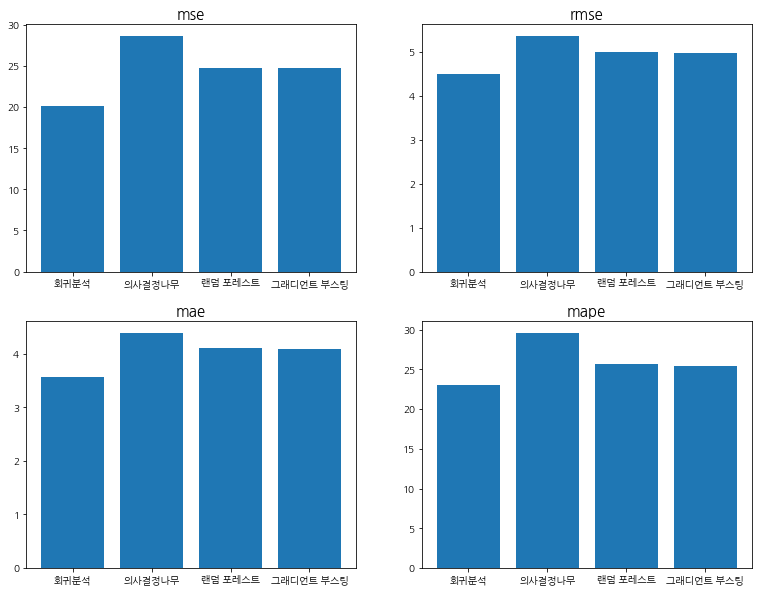

In [22]:
fig, ax = plt.subplots(nrows= 2, ncols = 2, figsize = (13,10))

ax[0,0].bar(models, mse)
ax[0,0].set_title('mse').set_fontsize(15)

ax[0,1].bar(models, rmse)
ax[0,1].set_title('rmse').set_fontsize(15)

ax[1,0].bar(models, mae)
ax[1,0].set_title('mae').set_fontsize(15)

ax[1,1].bar(models, mape)
ax[1,1].set_title('mape').set_fontsize(15)

## 주성분분석

In [25]:
df_raw = pd.read_csv('/home/piai/Downloads/직무능력평가.csv', engine = 'python')
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


In [2]:
df_raw = pd.read_csv('/home/piai/Downloads/체질검사.csv', engine = 'python')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


* EVAL : 직무수행평가
* DISSATIS : 불만처리수준
* PRIVILEGE : 특권허용정도
* CHANCE : 배움의 기회
* ADVANCE : 업무성과에 따른 승진
* CRITISM : 과실에 대한 비판 정도
* PROMOTION : 승진

In [3]:
#목표변수, 설명변수 데이터 지정
df_raw_y = df_raw['FAT']
df_raw_x = df_raw.drop('FAT', axis = 1 , inplace = False)
df_raw_y.head()
df_raw_x.head()

,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


### STEP2 선형관계 확인 : 산점도 및 상관계수

In [ ]:
#산점도 행렬
sns.pairplot(df_raw_x)

#pearson 상관계수: pearson, kendall, spearman
df_raw_x.corr().round(3)

KeyboardInterrupt: 

### STEP3 데이터 확인 및 scaling

In [4]:
#요약 통계량 -> scale 변환 필요 확인
df_raw_x.describe().round(3)

#변수 이름 저장
x_cols = df_raw_x.columns

#scale 변환 : ndarray 형식
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x)

#변환된 데이터 및 형태 확인
print(f'Scaled Data: \n {nd_scaled[:5].round(3)}')
print(f'Shape: \n {nd_scaled.shape}')

Scaled Data: 
 [[ 0.089  6.281  0.575  5.444  4.205  5.161  6.685  5.324  4.366  3.841
   4.221  0.167  3.403]
 [-1.422 -0.372  0.301  0.044 -0.93  -1.25  -0.756 -0.402 -0.993  0.826
  -1.086  0.663  0.612]
 [ 1.917 -0.04  -0.451  0.292  0.14   0.227 -0.224 -0.841 -0.121 -0.77
  -0.489 -1.47   0.612]
 [ 0.963 -1.063 -1.203 -1.151 -0.146 -0.572 -1.371 -1.223 -1.492 -1.066
  -0.19  -0.676 -1.427]
 [ 0.486  1.366 -1.682  1.322  2.255  2.745  1.804  0.591 -0.702  0.294
   0.805  0.216  0.183]]
Shape: 
 (252, 13)


In [5]:
#DataFrame 으로 저장
df_scaled = pd.DataFrame(nd_scaled, columns = x_cols)
df_scaled.head().round(3)

,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,0.089,6.281,0.575,5.444,4.205,5.161,6.685,5.324,4.366,3.841,4.221,0.167,3.403
1,-1.422,-0.372,0.301,0.044,-0.930,-1.250,-0.756,-0.402,-0.993,0.826,-1.086,0.663,0.612
2,1.917,-0.040,-0.451,0.292,0.140,0.227,-0.224,-0.841,-0.121,-0.770,-0.489,-1.470,0.612
3,0.963,-1.063,-1.203,-1.151,-0.146,-0.572,-1.371,-1.223,-1.492,-1.066,-0.190,-0.676,-1.427
4,0.486,1.366,-1.682,1.322,2.255,2.745,1.804,0.591,-0.702,0.294,0.805,0.216,0.183


In [6]:
#Scale 변환 데이터 요약 통계량
df_scaled.describe().round(3)

,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
count,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000
mean,0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000
std,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002
min,-1.820,-2.060,-11.120,-2.841,-2.558,-2.152,-2.085,-2.330,-2.323,-2.366,-2.479,-3.800,-2.608
25%,-0.726,-0.679,-0.519,-0.656,-0.769,-0.742,-0.616,-0.650,-0.671,-0.652,-0.688,-0.676,-0.676
50%,-0.150,-0.083,-0.041,0.003,-0.140,-0.149,-0.085,-0.077,-0.038,-0.179,-0.074,0.018,0.075
75%,0.725,0.616,0.575,0.591,0.541,0.629,0.506,0.562,0.554,0.531,0.680,0.663,0.612
max,2.872,6.281,2.079,5.444,4.205,5.161,6.685,5.324,4.366,6.383,4.221,3.092,3.403


### STEP4 주성분 분석

In [9]:
#주성분 분석: 주성분 분석:주성분1(prin1) ~ 주성분6(prin6) 생성 및 저장
pca = PCA(n_components = 13)
nd_pca = pca.fit_transform(df_scaled)

#생성된 주성분 점수 확인
print(f'PCA DATA: \n {nd_pca[:5]}')

#생성된 주성분 점수 row, column 개수 확인
print(f'Shape: \n {nd_pca.shape}')

PCA DATA: 
 [[ 1.51407865e+01  7.49180061e-01  1.73038829e+00  2.97562799e+00
  -1.20140416e+00  1.91649244e+00 -5.65465823e-01  6.41639529e-01
  -7.16668464e-01  6.67288487e-01  1.11830608e+00 -3.74402932e-01
  -4.01646380e-01]
 [-1.25745311e+00 -1.79805793e+00 -6.03591475e-01 -4.05941404e-01
   1.33324667e+00  8.22236818e-01  1.74463381e-01 -1.01801483e+00
   3.69261273e-02  3.76706308e-01 -8.75860804e-02 -1.14957740e-01
  -2.18982014e-01]
 [-7.27442052e-01  2.31886158e+00 -8.92096811e-01  6.82580352e-01
  -5.03280467e-01  6.00209382e-01 -5.16400793e-01 -9.56416513e-03
   4.79435580e-02 -2.64350345e-01  1.76015189e-01 -7.71764507e-02
  -1.35788495e-01]
 [-3.21015592e+00  1.46511228e+00  4.57907542e-01 -5.75637151e-01
   1.97721197e-02 -1.78803322e-01  7.16879046e-01  8.43042247e-01
   2.18223478e-01 -2.55255904e-01 -2.38793622e-01 -1.00886784e-01
  -1.22172296e-01]
 [ 3.24650172e+00  2.29304235e+00  1.82833929e+00 -2.33659425e-02
  -4.06978793e-01  1.14656798e+00  1.70117486e+00 -1.0

In [10]:
#주성분 분석: 주성분1(prin1) ~ 6 생성 및 저장
df_pca = pd.DataFrame(nd_pca, columns = ['Prin' +str(i) for i in range(1,14)])

#주성분 분석용 데이터와 주성분 점수 결합
df_scaled_pca = df_scaled.join(df_pca)
df_scaled_pca.head()

,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,...,Prin4,Prin5,Prin6,Prin7,Prin8,Prin9,Prin10,Prin11,Prin12,Prin13
0,0.088660,6.280963,0.574790,5.444135,4.204531,5.161290,6.684808,5.323774,4.366207,3.841274,...,2.975628,-1.201404,1.916492,-0.565466,0.641640,-0.716668,0.667288,1.118306,-0.374403,-0.401646
1,-1.422033,-0.372455,0.301235,0.044490,-0.929933,-1.250360,-0.755929,-0.401936,-0.993129,0.826247,...,-0.405941,1.333247,0.822237,0.174463,-1.018015,0.036926,0.376706,-0.087586,-0.114958,-0.218982
2,1.917394,-0.040040,-0.451039,0.291802,0.139747,0.227107,-0.224448,-0.840907,-0.120679,-0.769944,...,0.682580,-0.503280,0.600209,-0.516401,-0.009564,0.047944,-0.264350,0.176015,-0.077176,-0.135788
3,0.963272,-1.062856,-1.203313,-1.150851,-0.145501,-0.572026,-1.371328,-1.222621,-1.491672,-1.065535,...,-0.575637,0.019772,-0.178803,0.716879,0.843042,0.218223,-0.255256,-0.238794,-0.100887,-0.122172
4,0.486211,1.366332,-1.682033,1.322269,2.255336,2.745306,1.803573,0.590521,-0.702312,0.294183,...,-0.023366,-0.406979,1.146568,1.701175,-0.101494,0.539822,0.304860,0.468418,0.275033,0.090397


### 주성분 분석 및 결과 : 고유값(Eigenvalue) 확인 및 주성분 개수 결정

In [11]:
#주성분 분석 통계량 저장 : 주성분 번호, Eigenvalue, Eigenvalue ratio
df_pca_stat = pd.DataFrame()
df_pca_stat['PrinNo'] = [I for I in range(1,14)]
df_pca_stat['EigenValues'] = pca.explained_variance_ 
df_pca_stat['EigenValueRatio'] = pca.explained_variance_ratio_
df_pca_stat['CumEigenValueRatio'] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,8.072,0.618,0.618
1,2,1.360,0.104,0.723
2,3,1.006,0.077,0.800
3,4,0.670,0.051,0.851
4,5,0.601,0.046,0.897
5,6,0.315,0.024,0.921
6,7,0.287,0.022,0.943
7,8,0.262,0.020,0.963
8,9,0.184,0.014,0.978
9,10,0.135,0.010,0.988


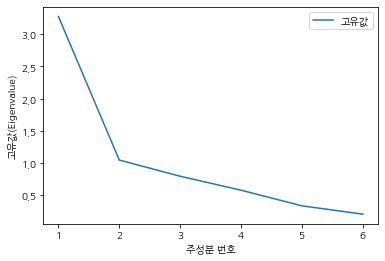

In [46]:
#scree okit
plt.plot(df_pca_stat['PrinNo'], df_pca_stat['EigenValues'], label = '고유값')

#그래프 label, legend 설정
plt.ylabel('고유값(Eigenvalue)')
plt.xlabel('주성분 번호')
plt.legend(loc = 'best')

* 주성분 번호 '2' 선택 => 주성분 갯수 2개로 결정

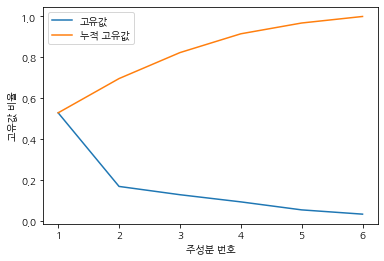

In [47]:
#고유값 비율 그래프 생성
plt.plot(df_pca_stat['PrinNo'],df_pca_stat['EigenValueRatio'], label = '고유값')

#누적된 고유값 비율 그래프 생성
plt.plot(df_pca_stat['PrinNo'], df_pca_stat['CumEigenValueRatio'], label = '누적 고유값')
plt.ylabel('고유값 비율')
plt.xlabel('주성분 번호')
plt.legend(loc ='best')

* 공분산의 경우 누적 80%까지 정하기 때문에
* 주성분 번호 '2' 선택 => 주성분 갯수 2개로 결정

In [12]:
#주성분 분석 데이터의 변수 이름
x_cols = pd.DataFrame({'Feature': df_raw_x.columns})

#주성분 prin1~6 까지의 고유벡터 저장
#전치 결과 pd.DataFrame(pca.componets_, columns = ['Prin1','Prin2','Prin3','Prin4','Prin5','Prin6'], axis = 1)
#파이썬 PCA 분석 시 SVD 연산 방식의 차이 반영(전치, 부호 변경)

df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T * -1, 
                columns = ['Prin1', 'Prin2','Prin3'])], axis = 1)
df_eigenvector.round(3)

ValueError: Shape of passed values is (13, 13), indices imply (13, 3)

### STEP5 주성분 상관/회귀분석 :상관관계

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


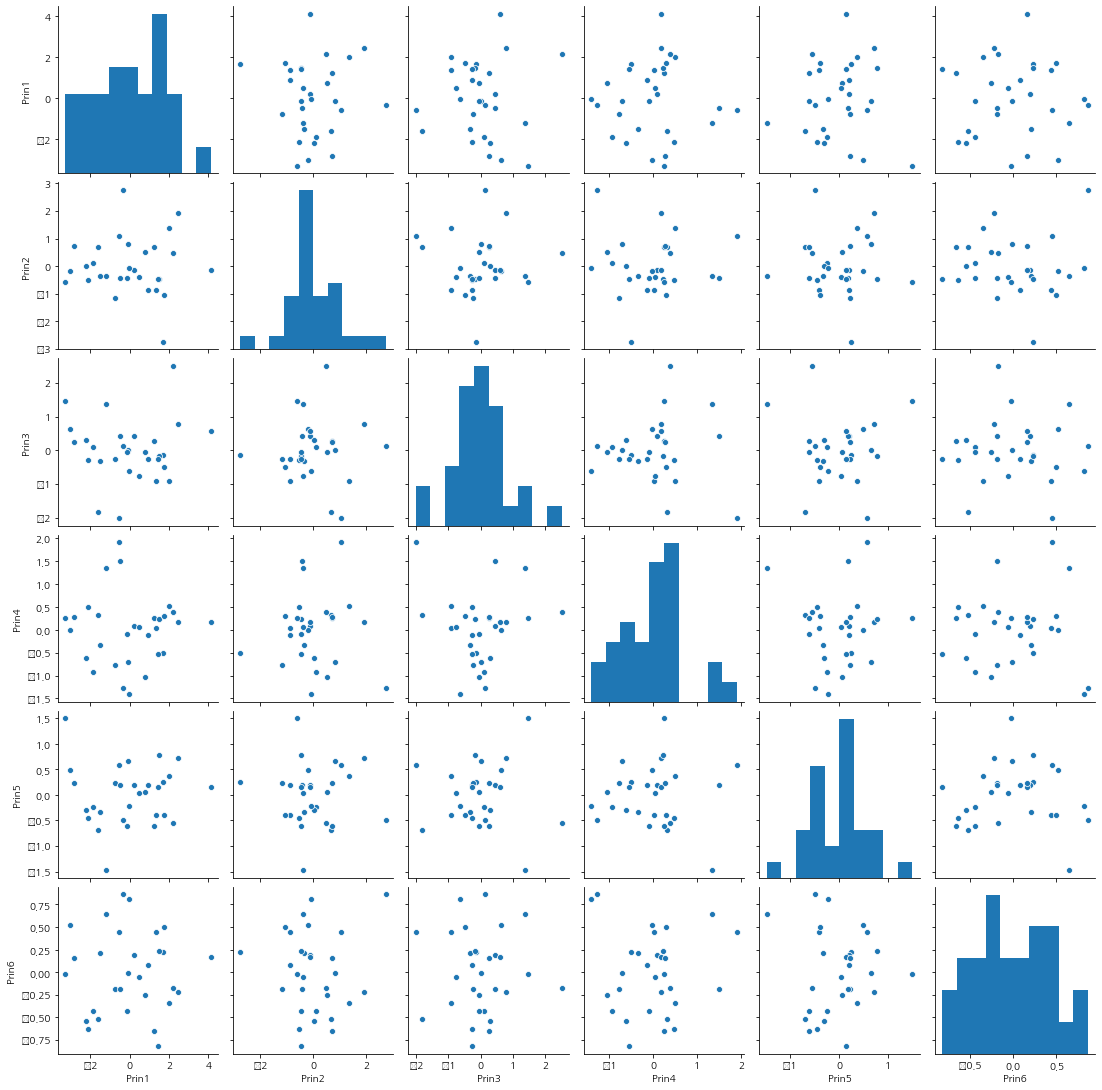

In [59]:
# 상관관계 : 산점도 행렬
sns.pairplot(df_pca)

In [53]:
df_pca.corr().round(3)

,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
Prin1,1.0,0.0,-0.0,-0.0,-0.0,0.0
Prin2,0.0,1.0,0.0,-0.0,-0.0,0.0
Prin3,-0.0,0.0,1.0,0.0,0.0,-0.0
Prin4,-0.0,-0.0,0.0,1.0,-0.0,-0.0
Prin5,-0.0,-0.0,0.0,-0.0,1.0,-0.0
Prin6,0.0,0.0,-0.0,-0.0,-0.0,1.0


* 주성분은 서로 독립적, 상관계수 = 0, 서로 관계가 없다


### 1) 다중선형 회귀분석: 원천 데이터 활용


In [56]:
#다중선형 회귀분석: 원천 데이터 활용
#원천 데이터에 절편 추가
df_raw_x_const = sm.add_constant(df_raw_x)

#회귀모델 생성
reg_model = sm.OLS(df_raw_y, df_raw_x_const)

#회귀모델 적함
reg_model = reg_model.fit()

#모델 성능 확인
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           1.24e-05
Time:                        15:26:02   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7871     11.589      0.931      0.3

### 2) 다중선형 회귀분석: Scale 변환 데이터 활용


In [57]:
#다중선형 회귀분석: Scale 변환 데이터 활용
#scale 변환 데이터에 절편(const) 컬럼 추가
df_scaled_const = sm.add_constant(df_scaled)
reg_model = sm.OLS(df_raw_y, df_scaled_const)
reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           1.24e-05
Time:                        15:28:19   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.6333      1.290     50.087      0.0

* scale 변환해도 설명력과 pvalue 값에는 차이가 없다!!

### 3) 다중선형 주성분 회귀분석: 주성분 점수(score) 데이터 활용


In [14]:
#다중선형 주성분 회귀분석: 주성분 점수(score) 데이터 활용
#Eigenvalue, Scree plot 기준으로 적정 주성분 선택
x_var = ['Prin1', 'Prin2','Prin3']

#선택된 주성분 점수 데이터에 절편(const) 칼럼 추가
df_pca_const = sm.add_constant(df_pca[x_var])

#회귀모델 생성
reg_model = sm.OLS(df_raw_y, df_pca_const)

#회귀모델 적함
reg_model = reg_model.fit()

#모델 성능 확인
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     115.9
Date:                Tue, 24 Nov 2020   Prob (F-statistic):           6.37e-47
Time:                        10:09:32   Log-Likelihood:                -782.06
No. Observations:                 252   AIC:                             1572.
Df Residuals:                     248   BIC:                             1586.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.1508      0.342     55.958      0.0